# Data Analysis of the Most Trending Data Science Channels on YouTube ![YouTube Icon](res\youtube.ico "YouTube")

# 1. Aims, objectives and background

## 1.1. [I]ntroduction

YouTube is a Google-owned online video sharing and social media platform based in the United States. Steve Chen, Chad Hurley, and Jawed Karim founded it on February 14, 2005. It is the second-most-visited website in the world, right after Google. YouTube has over one billion monthly users who view over one billion hours of video each day. As of May 2019, more than 500 hours of video footage were being uploaded every minute. YouTube was purchased by Google for $1.65 billion in October 2006 [[1]](https://en.wikipedia.org/wiki/YouTube). Characterized by a powerful and complex algorithm, YouTube offer lots of advantageous benefits such as the ability to promote a business and generate income [[2]](https://wearegrow.com/8-massive-benefits-of-using-youtube-for-business/). 

However, understanding how a video works is kind of difficult, as we've probably all witnessed, dead or old videos sometimes resurface out of nowhere whether it had been popular at the time or not and even without any particular interest in it. YouTube's algorithm, like those of other social media sites, has developed over time [[3]](https://sproutsocial.com/insights/youtube-algorithm/) and hence making it hard to determine the success of a Youtube video as to what characteristics a video should have to perform better? can features like video duration, likes and comments affect the performance and if so, which one impact the most?

The extent of this project is confined to data science channels. As a result, the statistics of roughly five (05) of the most popular data science Youtube channels will be investigated in this study.

## 1.2. [A]ims and [O]bjectives

Throughout this project, we'll be covering the following:

- Defining Youtube API, its limitations and utilizing it to retrieve data.
- Analyze video data from several YouTube channels, compare them, and analyze their performance through investigating queries such as:
    - Does the amount of likes and comments on a video affect its popularity?
    - What's the average views per channel's video?
    - Does video length influence likes and engagements ?
    - How active and popular are the channels ?
    - In the amount of tags a key factor for gaining views?
- Utilizing NLP techniques to investigate text to gain some insights such as:
    - Popular topics used in titles.
    - Sentiment analysis on videos comments in relation to each channel.

## 1.3. [S]teps of the project
1. Request metadata from the YouTube API and transform them into a data frame for readability and ease of usage.
2. Preprocess data and engineer additional features for further analysis.
3. Exploratory data analysis (charts + interpretation).
4. Conclusions.


#### *The approach we'll be following is simple: we'll plot a graphical representation of our data alongside a brief explanation/assumptions, then draw our final conclusion in the conclusion section.*

## 1.4. About the [D]ata

We're well aware that there are readily available YouTube videos datasets on the web, some of which are updated daily, but for the sake of learning, we've decided to collect the data ourselves so as we can showcase our skills in data collection from scratch and our capabilities of using APIs such as YouTube's. Besides, finding the right data for a certain niche, such as our choice of **Data Science**, is unlikely, so it's sort of necessary at this point.

That said, the dataset is created using the [Google Youtube Data API version 3.0](https://developers.google.com/youtube/v3).

### Limitations and advantages

The data size isn't optimal but since this is a small project, a selection of only 5 YouTube channels is fairly acceptable. on the other hand, we've picked up the most popular and engaging ones based on the amount of their subscriptions; nonetheless, the more data you get the better.

Despite of its size, the data is complete; by complete we mean that all of the data for each selected feature of every channel has been gathered and is not null, but there are still a few missing data points which are the result of the channel's owner not failing to provide any information about them, such as the video description or the tags.

### Data source ethics

The Youtube API is completely free; however, The cost of using the YouTube Data API is determined on the quota usage. You get 10,000 free points every day and every request costs at least one point. You may use the [Quota Calculator](https://developers.google.com/youtube/v3/determine_quota_cost) to estimate your quota expenses, and if you require more inquiries, you can ask for additional quotas by filling out a [Form](https://support.google.com/youtube/contact/yt_api_form) with YouTube API Services.


# 2. Package imports, Data collection & Preprocessing

## 2.1. Package imports

In [1]:
# Main imports
from datetime import datetime
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import isodate
import time
import calendar
import re
import json
import urllib.request
import csv
import PIL

# Youtube API
from googleapiclient.discovery import build

# Data visualization libraries
from matplotlib import pyplot as plt, dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
stop_words = set(stopwords.words("english"))

In [ ]:
# Sentiment model
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax

## 2.2. Data collection

First things first, an **API-KEY** is required to start using the API which you can request after creating a project on [Google API Console](https://console.cloud.google.com/apis/dashboard). The **ID** of each selected channel should then be retrieved and kept in a variable. After that, we've written some functions responsible for requesting the data through the API.

The steps are simple:

1. Retrieve the playlists IDs via the **get_channel_stats** function.
2. The playlist IDs are passed to the **get_video_ids** function, which returns a list of all the video IDs.
3. Finally, the **get_video_details** function will use the video IDs to extract all of the statistics for all videos.

We've also gathered comments from each video, or at least for those that have them, although we didn't utilize the API to do so. The reason for this is the API's quota cap, being set at 10,000, it makes it relatively low when you consider getting a huge amount of comments (over 285k in our case), and hence not the optimal option. As a result, we used a different method, browsing through all of the videos and collecting the comments. Of course the process is automated with Selenium library. Nonetheless, we've provided the API's way for retrieving the comments in the extra section.

As you would probably notice, the first parameter of the functions is always the same which is the object responsible for interacting with the API, whilst the second is the only one that differs according to each task.

In [ ]:
def key(key_name):
    with open("Logs.json", "r") as f:
        logs = json.load(f)
    return logs[key_name]

API_KEY = key("YTB_API_KEY")

# For privacy purposes, we've stored the API key in a Json file and used the function above in order to retrieve it. 
# API_KEY = "ENTER_YOUR_KEY_HERE"
youtube = build('youtube', 'v3', developerKey="ENTER_YOUR_KEY_HERE")


In [6]:
# List of channels ids from which we intend to retrieve data. You can add as much as you'd like.
channel_ids = [
    'UC4JX40jDee_tINbkjycV4Sg', # Tech with tim
    'UCfzlCWGWYyIQ0aLC5w48gBQ', # Sentdex
    'UCCezIgC97PvUuR4_gbFUs5g', # Corey Schafer
    'UCNU_lfiiWBdtULKOw6X0Dig', # Krish Naik"
    'UCtYLUTtgS3k1Fg4y5tAhLbw', # StatQuest Josh Starmer
]

In [7]:
def get_channel_stats(youtube, channel_ids):
    '''
    Get channel statistics: title, date of publication, subscriber count, view count, video count, upload playlist.

    Returns:
    Dataframe containing the mentioned channel statistics for all channels in the provided list above.
    '''
    all_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=",".join(channel_ids))
    
    response = request.execute()

    for i in range(len(response["items"])):
        data = dict(
            channelName = response['items'][i]['snippet']['title'],
            published_date = response['items'][i]['snippet']['publishedAt'],
            subscribers = response['items'][i]['statistics']['subscriberCount'],
            views = response['items'][i]['statistics']['viewCount'],
            totalVideos = response['items'][i]['statistics']['videoCount'],
            playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
        )
        all_data.append(data)
    return pd.DataFrame(all_data)


In [8]:
def get_video_ids(youtube, playlist_id):
    '''
    Get list of video IDs of all videos in the given playlist
    
    Returns:
    List of video IDs of all videos in the playlist
    '''
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids


In [9]:
def get_video_details(youtube, video_ids):
    '''
    Get video statistics of all videos with given IDs

    Returns:
    Dataframe with statistics of videos:
        'channelTitle', 'title', 'description', 'tags', 'publishedAt'
        'viewCount', 'likeCount', 'commentCount',
        'duration'
    '''
    video_data = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'commentCount'],
                             'contentDetails': ['duration']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            video_data.append(video_info)

    return pd.DataFrame(video_data) 


In [ ]:
channel_data = get_channel_stats(youtube, channel_ids)

video_df = pd.DataFrame()

for channel in channel_data['channelName'].unique():
    print("Getting video information from channel: " + channel)
    playlist_id = channel_data.loc[channel_data['channelName'] == channel, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # Get video data
    video_data = get_video_details(youtube, video_ids)
    
    # Concatenate video_data with video_df
    video_df = pd.concat([video_df, video_data], axis=0)

# Storing video id on a separate file which will be used to collect the comment.
temp = dict()
for i, id in enumerate(video_df[video_df['video_id'] != "#NAME?"]["video_id"].values):
    temp.update({i : id})
with open(r"Data\json\video_id.json", "w") as file:
    json.dump(temp, file)

channel_data.to_csv(r"Data\csv\channel_data.csv", sep = ';', index = False)
video_df.to_csv(r"Data\csv\video_stats_with_ids.csv", sep = ';', index = False)


Loading the data if already collected and saved externally.

In [7]:
try:
    channel_data = pd.read_csv(r"Data\csv\channel_data.csv")
except:
    raise FileNotFoundError("File not found")

try:
    video_df = pd.read_csv(r"Data\csv\video_stats_with_ids.csv", sep=";")
except:
    raise FileNotFoundError("File not found")

try:
    with open(r"Data\json\ytb_com.json","r") as file:
        ytb_com = json.load(file)
    comment_df = pd.DataFrame(columns=["video_id", "raw_comments"])
    for i in range(len(ytb_com)):
        comment_df.loc[i] = [list(ytb_com)[i], str(list(ytb_com.values())[i])]
    comment_df['comments'] = comment_df['raw_comments'].str.strip('[]').str.split(',')
except:
    raise FileNotFoundError("File not found")


## 2.3. Preprocessing & Feature Engineering

Before any EDA, preprocessing & feature engineering is mandatory, especially when the data isn't cleaned at all. However, with the exception of data types, ours is not in its worst state, so we'll be much more focused on data wrangling such as altering raw data to make it more usable for analysis purposes, which entails converting and mapping data from its raw state to some other format in order to make it more suitable and beneficial for future usage.

We preferred using a function that grouped all of the individual changes together with respect to each DataFrame (channel_data & video_df).

In [13]:
def channel_data_preprocessing():
    #Convert object features to integer
    numeric_cols = ['subscribers', 'views', 'totalVideos']
    channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors = "coerce", downcast = "integer", axis = 1)

    #Convert the publishedAt column to the right dtype (date)
    channel_data["published_date"] = channel_data["published_date"].apply(lambda date: datetime.strptime(date[:10], '%Y-%m-%d'))

    #Create new feature (Average view per video)
    channel_data["AvgView_per_vid"] = channel_data["views"] / channel_data["totalVideos"]
    
    #Create new feature (Channel age by days) which indicates how old is the channel
    channel_data["channel_age_in_days"] = channel_data["published_date"].apply(lambda date: (pd.Timestamp(datetime.now()) - date).days)
channel_data_preprocessing()

In [14]:
def video_df_preprocessing():
    #Convert object features to integer
    numeric_cols = ["viewCount","likeCount", "commentCount"]
    video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce',downcast = "integer", axis=1).reset_index(drop = True)

    #Convert publishedAt column to the right dtype (date) & creating another 02 features displaying the day of the week and time the video was published
    video_df["publishedAt"] = pd.to_datetime(video_df['publishedAt'])
    video_df["publishedDayName"] = video_df["publishedAt"].apply(lambda date: date.strftime("%A"))
    video_df["publishedTime"] = pd.to_datetime("2000-01-01 " + video_df["publishedAt"].dt.time.astype(str))
    
    #Create 12 hour based (AM-PM) upload time (hour only)
    video_df["upload_time_12_base"] = video_df["publishedAt"].dt.time.apply(lambda x: str(x.hour +1) if x.minute >= 30 else str(x.hour))
    video_df["upload_time_12_base"] = video_df["upload_time_12_base"].apply(lambda x: datetime.strptime("0", "%H").strftime("%I%p") if x == "24" else datetime.strptime(x, "%H").strftime("%I%p"))
    video_df["upload_time_12_base"] = video_df["upload_time_12_base"].apply(lambda x: x[1:] if x[0] == "0" else x)

    #Create new feature (duractionSecs) which convert the duration feature into seconds
    video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x)).astype('timedelta64[s]')

    #Create new feature (tagsCount)
    try:
        video_df["tagsCount"] = video_df["tags"].apply(lambda tags: 0 if tags is None else len(tags))
    except:
        # A work around in case the tag feature contains lists withing a string instead of actual lists.
        # Generally happens when we save a DataFrame to an external csv file and then reload it again resulting a conversion of lists into strings.
        video_df['tags'] = video_df.tags.str.strip("[]").str.replace("'","").str.split(",")
        video_df["tagsCount"] = video_df["tags"].apply(lambda tags: 0 if not isinstance(tags, list) else len(tags))
    

    #Create new feature (titleLength) which counts the length of the title feature
    video_df["titleLength"] = video_df["title"].apply(lambda title: len(title))

    #Create new feature (likeRatio) which calculate likeCount per 1000 ratio
    video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000

    #Create new feature (commentRatio) which calculate commentCount per 1000 ratio
    video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

    #Create new feature (likePercent) which calculate the % of likes given the total number of views
    video_df['likePercent'] = video_df['likeCount']/ video_df['viewCount'] * 100

    #Create new feature (commentPercent) which calculate the % of comment given the total number of views 
    video_df['commentPercent'] = video_df['commentCount']/ video_df['viewCount'] * 100
    
    # Creating a dictionary containing the age of each channel.
    # The age is estimated by the day the first and last video were uploaded, not by the day the YouTube channel was originally created.
    channel_age_dict = dict()
    for channel in video_df.channelTitle.unique():
        channel_age_dict[channel] = (video_df.groupby("channelTitle")["publishedAt"].max() - video_df.groupby("channelTitle")["publishedAt"].min()).loc[channel].days

    total_vid_dict = channel_data["totalVideos"].to_frame().set_index(channel_data["channelName"]).to_dict()["totalVideos"]

    # Constructing a dictionary with each channel's monthly average number of videos posted then converting it to a DataFrame.
    avg_video_month_dict = dict()
    for channel in channel_age_dict.keys():
        avg_video_month_dict[channel] = round(total_vid_dict[channel]/(channel_age_dict[channel] / 365 * 12))

    global avg_video_month_df
    avg_video_month_df = pd.DataFrame(avg_video_month_dict.items(), columns=["channelName","avg_vid_month"]).sort_values(by = 'avg_vid_month', ascending=False)
    
    avg_video_month_df.reset_index(drop = True, inplace = True)
    video_df.reset_index(drop = True, inplace = True)
video_df_preprocessing()

# 3. Exploratory Analysis

## Data preview

***
### To begin, we'll be looking at the first data (channel_data) to get a generelized overview of the channels which we'll be studying, and then move on to some advanced analysis on the detailed dataset (video_df).
***

In [11]:
channel_data

channelName        published_date  subscribers      views  \
0                Tech With Tim  2014-04-23T01:57:10Z       960000   81224673   
1                   Krish Naik  2012-02-11T04:05:06Z       563000   51970347   
2                      sentdex  2012-12-16T20:49:11Z      1110000  101446501   
3  StatQuest with Josh Starmer  2011-05-24T01:52:48Z       712000   36608014   
4                Corey Schafer  2006-05-31T22:49:22Z       920000   71881981   

   totalVideos                playlistId  
0          717  UU4JX40jDee_tINbkjycV4Sg  
1         1374  UUNU_lfiiWBdtULKOw6X0Dig  
2         1248  UUfzlCWGWYyIQ0aLC5w48gBQ  
3          217  UUtYLUTtgS3k1Fg4y5tAhLbw  
4          230  UUCezIgC97PvUuR4_gbFUs5g

For our initial look, let's compare channel popularity by looking at the amount of subscribers for each channel.

In [18]:
fig = px.bar(channel_data.sort_values("subscribers", ascending=False), x = "channelName", y="subscribers",color = "channelName") 
fig.update_layout(
title="Channel' total subscribers",
xaxis_title="Channel",
yaxis_title="Nb of Subscriber",
showlegend = False,
font=dict(
    family="Courier New, monospace",
    size=18,
    color="RebeccaPurple"
    )
)
fig.show()

***
Next, we will plot the same comparison but this time we'll consider the total number of views with respect to each channel. The rank is almost identical to the subscription count rank, this is to be expected because logically the more subscribers a channel has the more views it receives. Although **Krish Naik** has more subscribers than **Josh Starmer**, the latter has more views overall.
***

In [19]:
fig = px.bar(channel_data.sort_values("views", ascending=False), x = "channelName", y="views",color = "channelName")
fig.update_layout(
title="Channel' total views",
xaxis_title="Channel",
yaxis_title="Overall views",
showlegend = False,
font=dict(
    family="Courier New, monospace",
    size=18,
    color="RebeccaPurple"
    )
)
fig.show()

***
We might aswell check the relationship between the two features we used above and see if there is any pattern. For this, we'll be using a scatter plot with a variable-sized feature, also referred as bubble chart, in which our variable **channel_age** will be the third dimension of the data, so the bigger the circle (data-point) the older the channel. The high correlation between the two (02) traits is undeniable, confirming the idea we've mentioned before as the more subscribers a channel has the more views it receives. Furthermore, we notice that despite being more recent than the others, **Sentdex** & **Tech With Tim** had a far more productive debut.
***

In [20]:
fig = px.scatter(channel_data, x = "subscribers", y = "views", size = "channel_age_in_days", color = "channelName", hover_name = "channelName",size_max=60)
fig.update_layout(
title="Relationship between Nb of subscribers and Nb of Views",
xaxis_title="Nb Subscribers",
yaxis_title="Nb Views",
legend_title="Channel",
font=dict(
    family="Courier New, monospace",
    size=18,
    color="RebeccaPurple"
    )
)
fig.show()

***
Considering we know the amount of videos each channel has, let's take a look at a visual representation of the average views per video. In spite of being generalized, it gives us a pretty good look at how each channel is performing. We'll be looking at this chart even more in detail in the next section.
***

In [21]:
fig = px.bar(channel_data.sort_values(by = ["AvgView_per_vid"]), x = "AvgView_per_vid", y = "channelName",color = "channelName", hover_name = "totalVideos", orientation="h")
fig.update_layout(
title="Channel's average views per video",
xaxis_title="Channel",
yaxis_title="Average Views",
showlegend = False,
font=dict(
    family="Courier New, monospace",
    size=18,
    color="RebeccaPurple"
    ),
coloraxis_colorbar = dict(title = "Nb of videos")
)
fig.show()

## PART I : Video analysis

***
#### Now that we've seen the big picture of our chosen channels, let's take a step forward and explore more in depth each of their videos statistics individually.
***

### Views distribution per channel
With the help of video statistics for all channels, we're able to check how the views are spread. It appears that the distribution of all channels are partially similar at the exception of ***Tech With Tim***, which has a viral livestream with over 8 Millions views. We can aslo notice that ***Krish Naik*** & ***Sentdex*** despite having few views overall, their views are more consistent across their videos.

In [22]:
fig = px.violin(video_df, x = 'channelTitle', y = "viewCount", color = "channelTitle", hover_name="title", points="all")
fig.update_layout(
    title = 'Views per channel',
    xaxis_title = "Channel",
    yaxis_title = "View count",
    showlegend = False,
    height = 500,
)
fig.show()

### Does the amount of likes and comments on a video affect its popularity?

At first glance, we can beyond any doubt confirm the connection between the features. However, **Likes** seems to have a greater correlation with **Views** than **Comments** do, as it is also shown with the correlation calculations, **r = 0.93** & **r = 0.79**, respectively. It is certainly to be expected as this is quite logical, the more views a video has, the more likely it'll get more likes and comments along the way. Let's try to look at it again but from a diffrent angle consistenting of plotting these relationships using the ratio of likes per 1000 views and comments per 1000 views alike.

In [23]:
view_like = round(video_df.viewCount.corr(video_df.likeCount),2)
view_com = round(video_df.viewCount.corr(video_df.commentCount),2)
fig = make_subplots(rows = 1, cols = 2, subplot_titles=(f"Like & View count (r={view_like})", f"Comment & View count (r={view_com})"))
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df['likeCount'], y = video_df['viewCount']),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df['commentCount'], y = video_df['viewCount']),
    row = 1, col = 2
)
fig.update_layout(title = "Relationship between Like/Comment counts & View counts", showlegend = False)
fig.update_xaxes(title_text = "Like Count", row = 1, col = 1)
fig.update_xaxes(title_text = "Comment Count", row = 1, col = 2)
fig.update_yaxes(title_text = "View Count") 
fig.show()
print(f"Correlation between Views and Likes: {view_like}")
print(f"Correlation between Views and Comments: {view_com}")

Correlation between Views and Likes: 0.93
Correlation between Views and Comments: 0.79


Plotting the relationships using the ratio of likes per 1000 views and comments per 1000 views alike.

In [24]:
view_like_r = round(video_df.viewCount.corr(video_df.likeRatio),2)
view_com_r = round(video_df.viewCount.corr(video_df.commentRatio),2)
fig = make_subplots(rows = 1, cols = 2, subplot_titles=(f"Like ratio & View count (r={view_like_r})", f"Comment ratio & View count (r={view_com_r})"))
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df["likeRatio"], y = video_df['viewCount']),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df["commentRatio"], y = video_df['viewCount']),
    row = 1, col = 2
)
fig.update_layout(title = "Relationship between View & Comment ratios and View counts", showlegend = False)
fig.update_xaxes(title_text = "Like ratio", row = 1, col =1)
fig.update_xaxes(title_text = "Comment ratio", row = 1, col = 2)
fig.update_yaxes(title_text = "View count")
fig.show()
print(f"Correlation between Views and Likes ratio: {view_like_r}")
print(f"Correlation between Views and Comments ratio: {view_com_r}")

Correlation between Views and Likes ratio: -0.1
Correlation between Views and Comments ratio: -0.15


After taking the ratios into account, the relationships is less apparent. The comment-view correlation turned to be completely inexistant leading to notice that many videos with millions of views have very few comments, whereas some videos with very few views have better engagement.

In terms of like-view ratio, we can still detect a positive connection at the beginning but it fades beyond a certain point, which suggests that the more views a video has, the more people will press the like button. This appears to corroborate the concept of social proof, which states that people copy the actions of others in an attempt to emulate behavior in certain situations.

### Does video length influence likes and engagements ?

Let's start by plotting the distribution showcasing the length of the videos.
As shown below, I made sure to exclude 3% of the videos with huge length allowing us to have a much better scale and hence better visual representation (much likely streaming videos), the majority of videos are between 200 and 1100 seconds long, or around 3 to 18 minutes.

In [25]:
threshold = round(video_df['durationSecs'].quantile(0.97),2)
mass_window = f"{round(video_df[(video_df['durationSecs'] <= 1100) & (video_df['durationSecs'] >= 200)].reset_index(drop = True).shape[0] / video_df.shape[0],3)*100}%"
fig = px.histogram(video_df[video_df['durationSecs'] < threshold].reset_index(drop = True), x = "durationSecs", nbins = 100)
fig.update_xaxes(range=[-100,threshold])
fig.add_vrect(x0=200, x1=1100, 
              annotation_text=mass_window, annotation_position = "inside",
              annotation=dict(font_size=25, font_family="Times New Roman"),
              fillcolor="green", opacity=0.25, line_width=0)
fig.update_layout(
    title = "Distribution of videos length",
    xaxis_title = "Video duration [Sec]",
    yaxis_title = "Frequency",
    font = dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

Now that we've got an idea of how video length is distributed, let's investigate whether it affects the number of likes and comments.
As seen in the graph below, we observe the shorter the video the more likely it is to receive likes and comments. When it comes to short-form videos, though, comments appear to perform better than likes.

In [26]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=("Video duration VS Like", "Video duration Vs Comments"))
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df["durationSecs"], y = video_df["likeCount"]),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(mode = "markers", x = video_df["durationSecs"], y = video_df["commentCount"]),
    row = 1, col = 2
)
fig.update_layout(title = "Relationship between View & Comment and Video duration", showlegend = False)
fig.update_xaxes(title_text = "Video duration [Sec]")
fig.update_yaxes(title_text = "Like count", row = 1, col = 1)
fig.update_yaxes(title_text = "Comment count", row = 1, col = 2)
fig.show()

### Is the amount of tags a key factor for gaining views?
Although, most videos have between 5 and about 27 tags, the link between the amount of tags and the number of views is vague; yet, lots of tags appear to be associated with less views.

In [60]:
# For a better representation, we're gonna remove some outliers
max_threshold = video_df["viewCount"].quantile(0.9975)
min_threshold = video_df["viewCount"].quantile(0.0025)
fig = px.scatter(video_df[(video_df["viewCount"] < max_threshold) & (video_df["viewCount"] > min_threshold)], x = "tagsCount", y = "viewCount")
fig.update_layout(
    title = "Relationship between Nb tags & Nb of views",
    xaxis_title = "Nb of tags",
    yaxis_title = "Views",
    font = dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    width = 800
)
fig.show()

### Which day of the week sees the highest videos?
Even though it depends on each person's agenda and not necessarily impact the performence of a video, it's still useful to get an idea. We observe the highest level of engagement (video upload) on YouTube occurs on Monday and Friday with Sunday being the least common day to upload videos. And on a regular day, a video is posted between 12:30 and 20:30 after midday.

In [28]:
fig = go.Figure()

fig = px.histogram(video_df, x="publishedTime", color = "publishedDayName", opacity = 0.85, nbins = 30)
fig.update_layout(title = "When YouTube videos are uploaded ?", xaxis_title = "Time of day", yaxis_title = "Frequency", legend_title = "Day", height = 600,bargap = 0.1)
fig.update_traces(marker_line_width=1,marker_line_color="black")
fig.show()

print(video_df["publishedDayName"].value_counts())

Monday       675
Friday       588
Tuesday      539
Wednesday    537
Thursday     508
Saturday     493
Sunday       453
Name: publishedDayName, dtype: int64


Let's unpack the previous graph so that we get two distinct charts for days and time.

In [29]:
fig = px.bar(x = video_df.publishedDayName.value_counts().index, y = video_df.publishedDayName.value_counts(), color = video_df.publishedDayName.value_counts().index)
fig.update_layout(
    title = "Nb of video uploaded per Day of the week",
    xaxis_title = "Day of the week",
    yaxis_title = "Nb of videos",
    showlegend = False,
    font = dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

The ***afternoon*** appear to be the most frequent period to post videos, more specifically between **1 p.m.** and **8 p.m.** with **3 p.m.** being the best time to upload a video.

**Note:** We have to keep in mind that YouTube provide its users the ability to schedule video publish time, thus it could explain some irregularities.

In [30]:
fig = px.histogram(video_df, x = "upload_time_12_base")
fig.update_xaxes(categoryorder = "total descending")
fig.update_layout(
    title = "Best Time of the day to upload videos",
    xaxis_title = "Time",
    yaxis_title = "Frequency",
    font = dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

### How popular are the channels ?

One of the most important metrics ratios to measure YouTube channel success are likes/comments to views. Instead of evaluating the ratio of the videos individually, we've prefered using the average of the percentages of every video related to each channel. In terms of Likes:Views, we notice that ***Sentdex*** & ***Tech With Tim*** are the most popular channels, with a ratio of over 3% and finally ***Corey Schafer*** being the least popular. When it comes to evaluate audience's engagement (Comments:Views), we observe that ***Josh Starmer*** & ***Krish Naik*** are taking the lead with a ratio of over 0.3%, ending once again with ***Corey Schafer***.

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(x=video_df.groupby("channelTitle").mean().index,
                y= video_df.groupby("channelTitle").mean()["likePercent"].sort_values(ascending=True),
                name="Avg. % Like",
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=video_df.groupby("channelTitle").mean().index,
                y=video_df.groupby("channelTitle").mean()["commentPercent"],
                name="Avg. % Comment",
                marker_color='rgb(26, 118, 255)',
                ))
fig.update_layout(
    title="Channel's Avg. % ratios like/comment to view count",
    xaxis = dict(
        title = "Channel",
        tickfont_size=14,
        ),
    yaxis=dict(
        title='Avg. %',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    height = 600,
)
fig.show()

### Which channel is the most active?
We'll measure a channel's activity by the number of videos it uploads within a month and distinguish the most and less active ones. Krish Naik, although not having the most followers, is the most active channel, uploading up to 14 videos a month, followed by Tim and Sentdex, who are almost at the same rate as Krish Naik. Last but not least, Corey Schafer and Josh Starmer are almost dormant, with just 2 to 3 videos uploaded every month.

In [32]:
fig = px.bar(avg_video_month_df, x = "channelName", y = "avg_vid_month", color = "channelName")
fig.update_layout(
title="channels' average video per month",
xaxis_title="Channel",
yaxis_title="Average video per month",
showlegend = False,
font=dict(
    family="Courier New, monospace",
    size=18,
    color="RebeccaPurple"
    )
)
fig.show()

### Visual representation of most frequent words in Title using Wordcloud
Another optional exploration to tackle on. The title's word cloud analysis has shown that it seems to have largely featured most tags related to our niche such as python, machine/deep learning, data analysis and primarily  **Data Science**. Important aspects such as tutorials, interviews, job experience and lifestyle are included likewise.

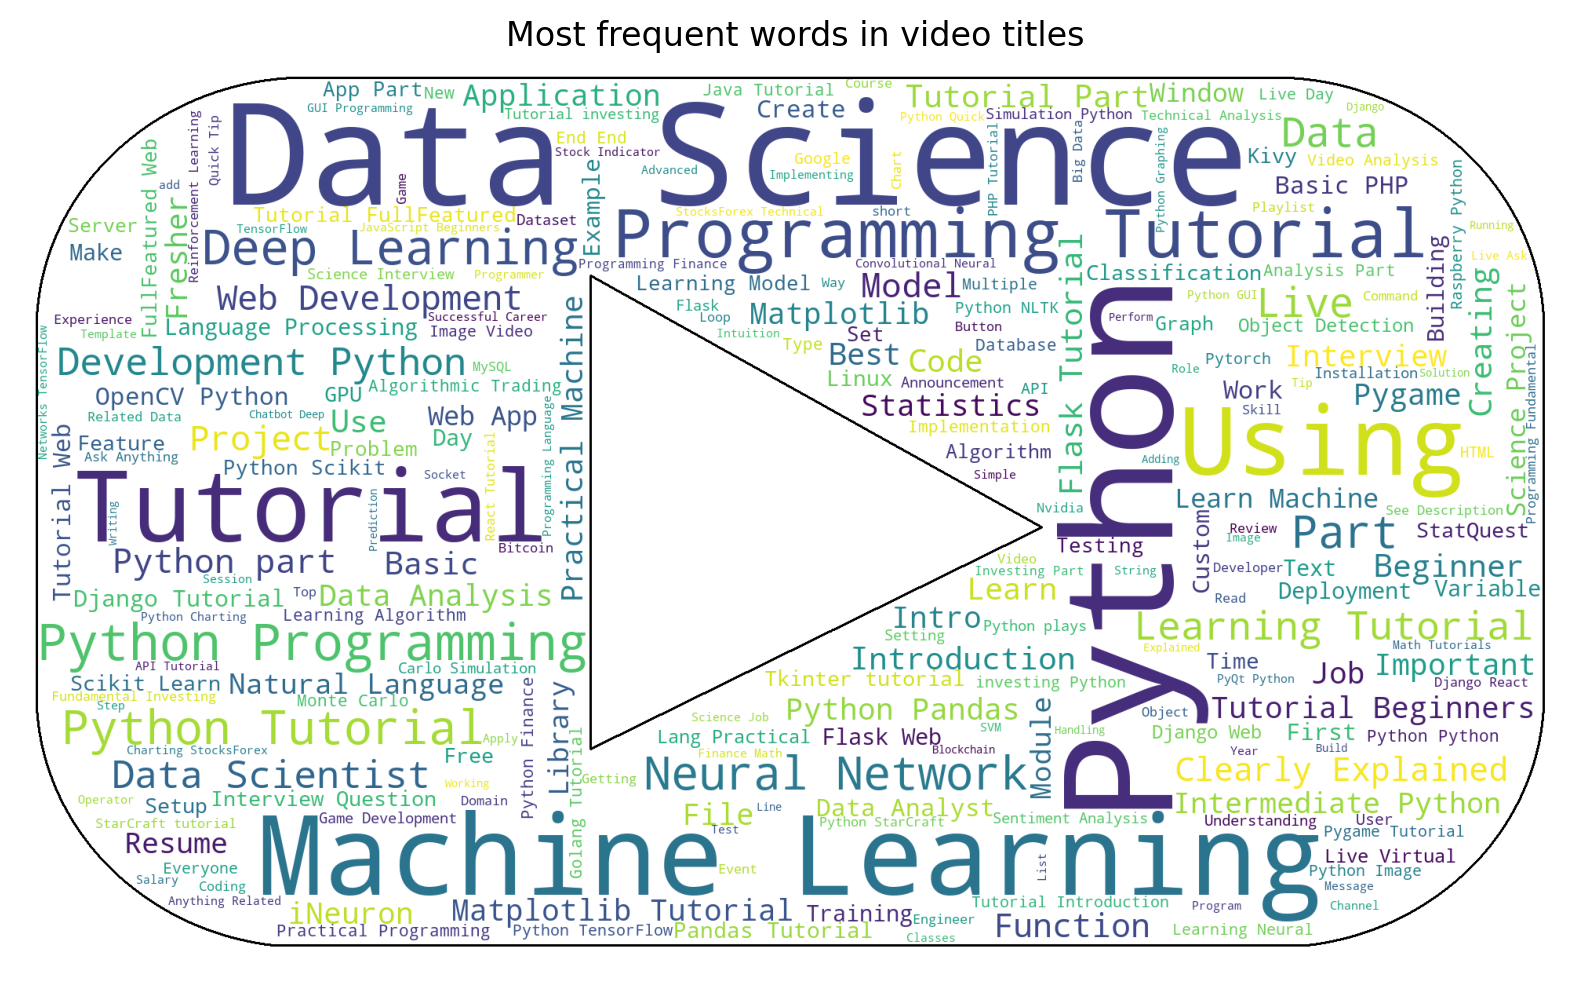

In [33]:
video_df["title_no_stopwords"] = video_df["title"].apply(lambda title: [item for item in title.split() if item not in stop_words])
video_df["title_no_stopwords"] = video_df["title_no_stopwords"].apply(lambda title: [re.sub("[^A-Za-z0-9]+","",word) for word in title])
# Removing single characters
video_df["title_no_stopwords"] = video_df["title_no_stopwords"].apply(lambda title: [word for word in title if len(word) > 2])
words_title = " ".join([word for title in video_df.title_no_stopwords for word in title])
worldcloud_mask = np.array(PIL.Image.open(r"res\ytb_icon.png"))
wc = WordCloud(
    mask = worldcloud_mask,
    background_color = "white",
    contour_color = "black",
    contour_width = 1.5,
    min_font_size = 3,
    max_words = 250,
).generate(words_title)
plt.figure(figsize=(10, 20), dpi=200)
plt.title("Most frequent words in video titles")
plt.imshow(wc)
plt.axis("off")
plt.show()

## PART II : Sentiment analysis on Comments

**Reminder:** As previously stated, due to the quota limit imposed by the YouTube API, we chose not to utilize it to collect video comments and made use of the Selenium library instead.

The Selenium method will be shared on a separate file.

Before we get into performing sentiment analysis, it'd be interesting to look up frequently-mentioned words in the video comments. We'll be using wordcloud visualization and displaying up to 250 most frequent words, much like we did with titles.

Given the representation below, apart from the obvious and main key word "Data Science" we can come up with some observations, positive words such as "Thanks" and "Great", requesting help with "Please" and "Help", additionally, words like "Please make" indicates that people are asking for videos for particular problems.

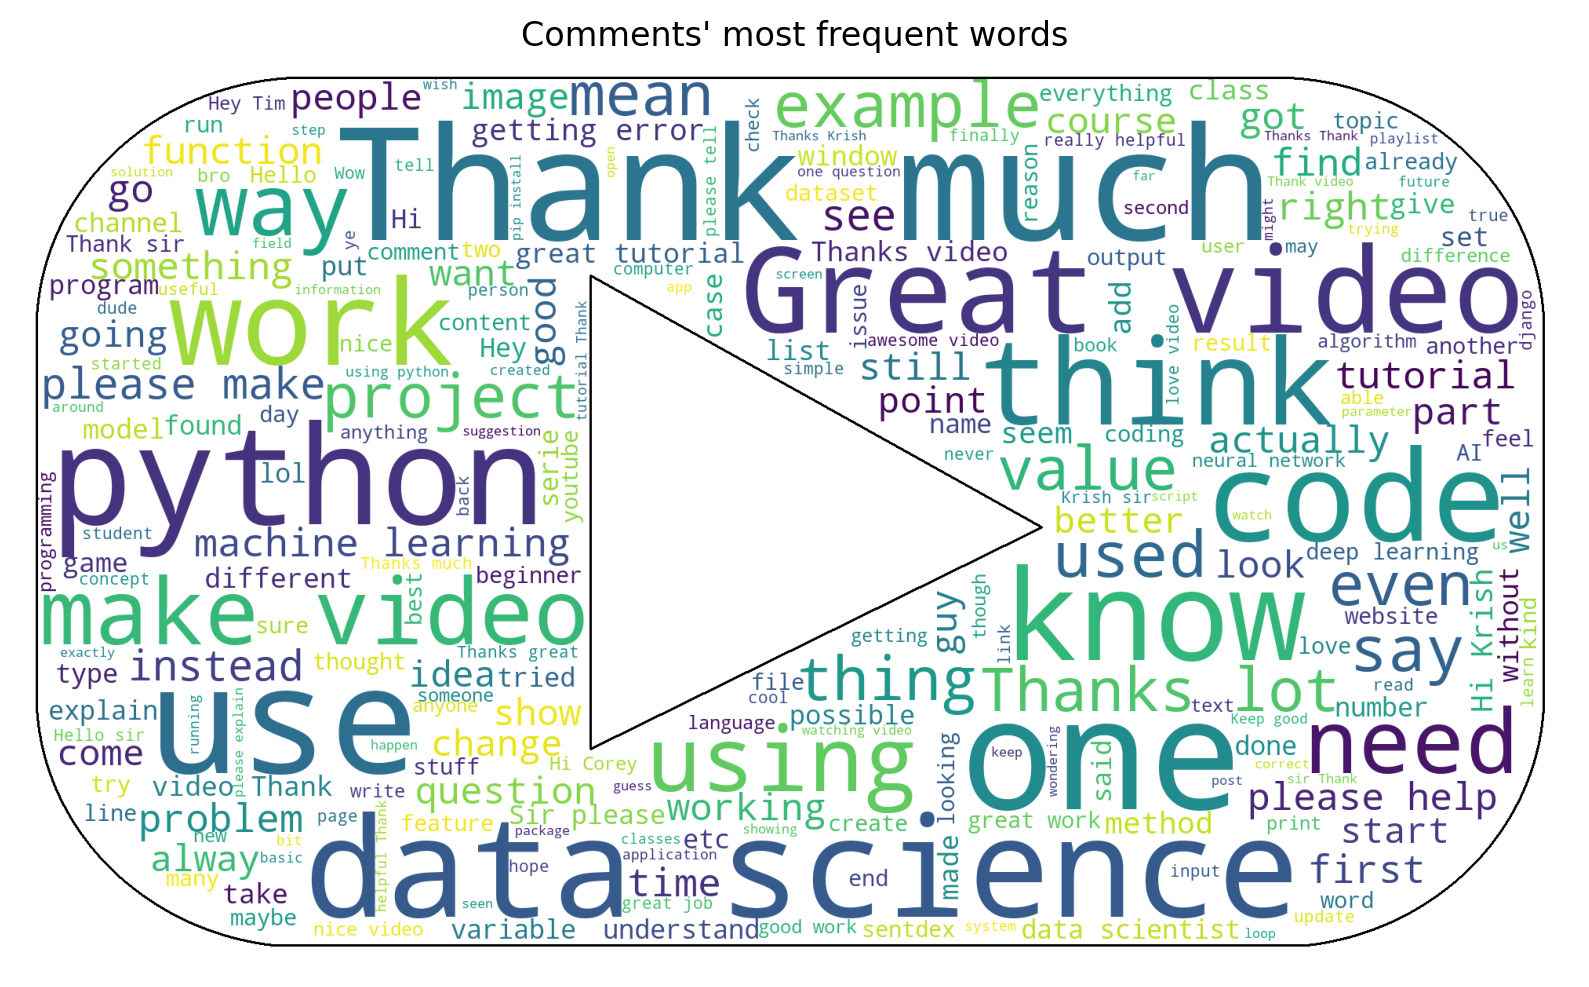

In [37]:
comment_df["comments_no_stopwords"] = comment_df["comments"].apply(lambda comments: [re.sub("[^A-Za-z0-9]+"," ",word) for word in comments])
comment_df["comments_no_stopwords"] = comment_df["comments_no_stopwords"].apply(
    lambda comment_list: [word for comment in comment_list for word in comment.split() if word.lower() not in stop_words])
words_comment = " ".join([word for item in comment_df.comments_no_stopwords for word in item if len(word) > 1])
worldcloud_mask = np.array(PIL.Image.open(r"res\ytb_icon.png"))
wc = WordCloud(
    mask = worldcloud_mask,
    background_color = "white",
    contour_color = "black",
    contour_width = 1.5,
    min_font_size = 3,
    max_words = 250
).generate(words_comment)
plt.figure(figsize=(10, 20), dpi=200)
plt.title("Comments' most frequent words")
plt.imshow(wc)
plt.axis("off")
plt.show()

For in-depth purposes, it's also possible to do the same visualization with channels individually.

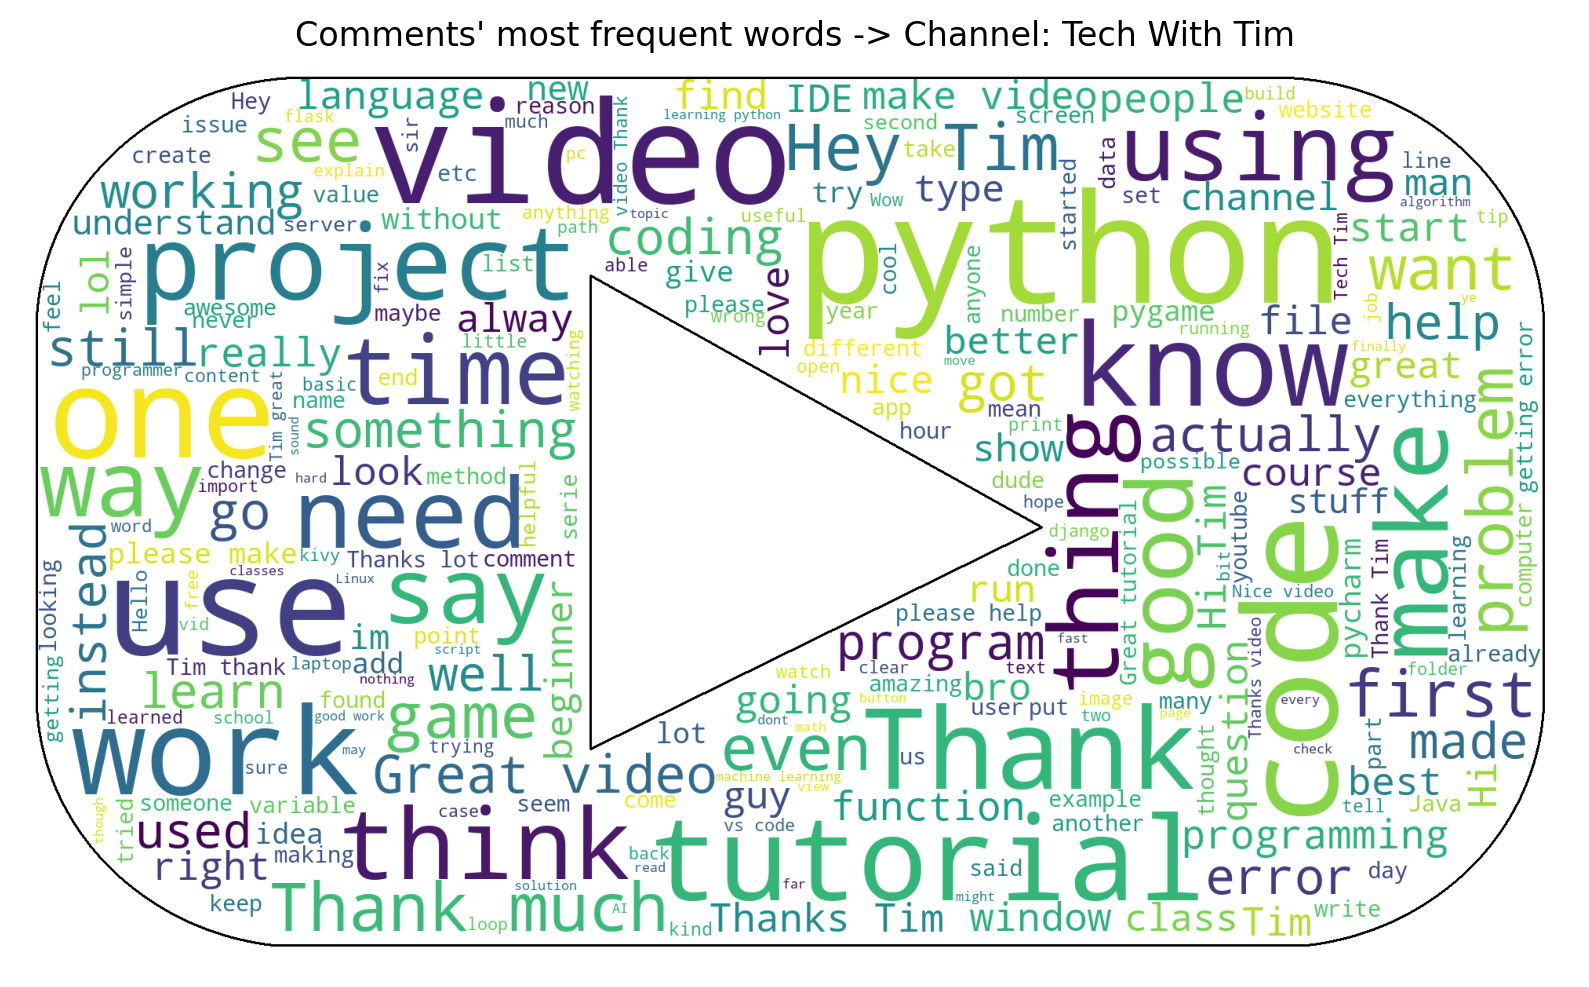

In [38]:
def ind_channel(channel):
    temp_df = video_df[video_df["channelTitle"] == channel]["video_id"].tolist()
    temp_df = comment_df[comment_df.video_id.isin(temp_df)]
    
    temp_df["comments_no_stopwords"] = temp_df["comments"].apply(lambda comments: [re.sub("[^A-Za-z0-9]+"," ",word) for word in comments])
    temp_df["comments_no_stopwords"] = temp_df["comments_no_stopwords"].apply(
        lambda comment_list: [word for comment in comment_list for word in comment.split() if word.lower() not in stop_words]
        )

    words_comment = " ".join([word for item in temp_df["comments_no_stopwords"] for word in item if len(word) > 1])

    worldcloud_mask = np.array(PIL.Image.open(r"res\ytb_icon.png"))
    wc = WordCloud(
        mask = worldcloud_mask,
        background_color = "white",
        contour_color = "black",
        contour_width = 1.5,
        min_font_size = 3,
        max_words = 250,
    ).generate(words_comment)
    plt.figure(figsize=(10, 20), dpi=200)
    plt.title(f"Comments' most frequent words -> Channel: {channel}")
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
ind_channel("Tech With Tim")
#ind_channel("Krish Naik")
#ind_channel("StatQuest with Josh Starmer")
#ind_channel("sentdex")
#ind_channel("Corey Schafer")

### Sentiment analysis

Due to comments counts variation of each video, instead of performing sentiment analysis on the comments to determine which videos receives more positive comments and which receives less, we preferred doing it with respect to each channel, and hence which channel receives the most positive feedback. That said, we'll be providing a code snippet in the EXTRA section which can be used to evaluate each video individually.

The algorithm used is a transfer model based on RoBERTa model which was trained on ~58M tweets and finetuned for sentiment analysis. Despite being trained mainly on tweets, we chose this specific model because of it's high performance and accurate results on various trials with our own data.

**Note:** It's possible to just build and train a ML/DL model from scratch and use it to evaluate our comments.

In [11]:
task='sentiment'
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [ ]:
# Download and load the model and tokenizer if not already done
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#Loading the model from your computer if it's already downloaded
def load_classifier():
    PATH = r'cardiffnlp\twitter-roberta-base-sentiment'
    tokenizer = AutoTokenizer.from_pretrained(PATH)
    model = TFAutoModelForSequenceClassification.from_pretrained(PATH)
    return tokenizer, model

# Uncomment and execute the line below if it suits your case
#tokenizer, model = load_classifier()

In [39]:
#Creating a separate dataframe for each channel' comments

corey_vid_id_list = video_df[video_df["channelTitle"] == "Corey Schafer"]["video_id"].tolist()
corey_df = comment_df[comment_df.video_id.isin(corey_vid_id_list)]

tim_vid_id_list = video_df[video_df["channelTitle"] == "Tech With Tim"]["video_id"].tolist()
tim_df = comment_df[comment_df.video_id.isin(tim_vid_id_list)]

josh_vid_id_list = video_df[video_df["channelTitle"] == "StatQuest with Josh Starmer"]["video_id"].tolist()
josh_df = comment_df[comment_df.video_id.isin(josh_vid_id_list)]

krish_vid_id_list = video_df[video_df["channelTitle"] == "Krish Naik"]["video_id"].tolist()
krish_df = comment_df[comment_df.video_id.isin(krish_vid_id_list)]
    
sentdex_vid_id_list = video_df[video_df["channelTitle"] == "sentdex"]["video_id"].tolist()
sentdex_df = comment_df[comment_df.video_id.isin(sentdex_vid_id_list)]

In [ ]:
# The process might be long, if that's the case, setting checkpoints or creating multiple Json files for each channel might a great idea.
def sentiment_eval(channel_df, channel_name):
    count = 1
    channel_sentiment_eval = [0,0,0]
    for com_list in channel_df:
        start = time.time()
        try:
            for com in com_list:
                encoded_input = tokenizer(com, return_tensors='tf')
                output = model(encoded_input)
                scores = output[0][0].numpy()
                scores = softmax(scores)
                channel_sentiment_eval[np.argmax(scores)] += 1
        except:
            print(f"Error attempting video nb: {count}")
        print(f'video nb {count} processed in: {round(time.time() - start,2)} seconds')
        count+=1
    sentiment_dict[channel_name] = channel_sentiment_eval

sentiment_dict = {}
sentiment_eval(sentdex_df["comments"],"Sentdex")
sentiment_eval(tim_df["comments"],"Tim")
sentiment_eval(krish_df["comments"],"Krish")
sentiment_eval(josh_df["comments"],"Josh")
sentiment_eval(corey_df["comments"],"Corey")
with open(r"Data\json\sentiment_eval.json", "w") as file:
    json.dump(sentiment_dict, file, indent=4,separators=(",",":"))

In [40]:
#Loading json file containing the sentiment evaluation
with open(r"Data\json\sentiment_eval.json", "r") as f:
  sentiment_data = json.loads(f.read())

In [41]:
#Percentages calculation
x_data = []
for i in sentiment_data.values():
    temp = []
    for j in i:
        temp.append(round(j / sum(i) * 100,2))
    x_data.append(temp)
neg, neut, pos = [round(np.array(x_data)[:][:,i].sum() / 5, 2) for i in range(3)]

After some coding and processing time we're finally displaying the visual representation of the sentiment evaluation of each channel. 

It's not surprising that a high percentage of comments are neutral because the commenter often expresses neither positive nor negative feelings and can also be a statement or just about anything else. Neutral sentiments aside, positive feedback comments outnumber negative ones on all channels; however, when it comes to audience satisfaction, **Josh** and **Corey** appear to be the best at the job, followed by **Krish** & **Tim** respectively, while **Sentdex** is the least successful in terms of satisfying content.

In [42]:
sentiment_labels = [f"Negative ({neg}%)", f"Neutral ({neut}%)", f"Positive ({pos}%)"]

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)', 'rgba(122, 120, 168, 0.8)']

y_data = list(sentiment_data.keys())

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=4)
            )
        ))


fig.update_layout(
    title = "Channel's sentiment evaluation in %",
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=0, r=0, t=100, b=25),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    #labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first x_axis -Negative- (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=sentiment_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
        # labeling the rest of percentages for each bar (x_axis)
        annotations.append(dict(xref='x', yref='y',
                                x=space + (xd[i]/2), y=yd,
                                text=str(xd[i]) + '%',
                                font=dict(family='Arial', size=14,
                                          color='rgb(248, 248, 255)'),
                                showarrow=False))
        # labeling the rest of the x_axis -Neutral, Positive- (on the top)
        if yd == y_data[-1]:
            annotations.append(dict(xref='x', yref='paper',
                                    x=space + (xd[i]/2), y=1.1,
                                    text=sentiment_labels[i],
                                    font=dict(family='Arial', size=14,
                                              color='rgb(67, 67, 67)'),
                                    showarrow=False))
        space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

# 4. Conclusions

Likes, Comments & Views on a YouTube video are more than simply numbers: they signify popularity as well as quality, originality, and the underlying messages behind the video. This is why we focused mostly on those feature most than any. 

With the help of data we've gathered from the top 5 data science YouYube channels, we've investigated so far quite a variety of intersting queries about how channels perform both individually and in comparison with each other, and here's a summuary of the captivating ones:


- **Sentdex** & **Tim** had a considerably more productive debut despite being more recent than the rest of the channels.

- **Corey Schafer** is by far the most consistent channel with views per video with a median of ~147k per video. Being the first and oldest channel among the sample to be created (2006) and even before Data Science started to be popular as it currently is, the channel was one of the few to be available and which offered a great amount of knowledge on the field. However, despite being the oldest channel, it doesn't perform the best.

- The more views a video has, the more likes and comments it gets. Although there is no certainty of a causal link, it might simply be a correlation which works both sides. However, we still believe the former is the most suited because views are first to be generated, neither likes nor comments. Then again, it's not wrong to think of it as both correlation and causality, because eventually, the more likes and comments a video has, the more likely it's going to be recommended by YouTube algorithm, thus generating more views. That said, compared to comments, likes appear to be a strong determinant of engagement since, let's face it, comments requires much more effort than just smashing the like button.

- Most videos are between 200 and 1100 seconds long, or about 3 to 18 minutes.

- The shorter the video, the more likely it will be liked and commented on. However, comments tend to outperform likes. Short-form videos are generally described as being direct and captivating which could validate our findings that short-form videos generate increased interaction.

- Multiple tags doesn't necessarily result in more views.

- Monday and Friday afternoons are the most common days to upload a video, mainly between 1 pm and 8 pm. However, posting videos over the weekends is atypical.

- **Sentdex** and **Tech With Tim** perform best in terms of likes, while **Josh Starmer** and **Krish Naik** top the charts for audience engagements (comments). On the other hand, **Corey Schafer** is the least on both sides.

- **Krish Naik** is the most active channel, uploading up to 14 videos a month, followed by **Tim** and **Sentdex** with 12 each. Even so, regular video posting is more common for full-time YouTubers than for those who also work as employers.

- Most video comments are positive which is indicated with words/sentences like "Thanks" and "Great video" for instance, also leading to assume that videos are helping a wide audience and hence performing better. Other words such as "Please" and "Help" implying people are asking for help for issues they might have encountered. Furthermore, sentences like "Please make" and "make video" suggest that people are requesting videos for particular problems.

- Comments evaluation is represented as follows:
    - Positive comments ⇨ 40.94%
    - Neutral comments  ⇨ 46.40%
    - Negative comments ⇨ 12.66%
#
- On the sentiment part, subscribers' feedback is crucial to measuring one's efficiency, and the findings reveal that **Josh** & **Corey** are the most performant ones while **Sentdex** is the least successful. And after further investigation, while knowing that **Josh**'s channel receives the most positive feedback, it turns out **Josh**'s approach to engaging with its audience is unique and friendly, incorporating a buzzword **BAM** usually as a result of a problem's clarification if that makes sense, and hence the subscribers grew fond of it.
#
**Project limitation:**

The findings we've identified throughout the study may not be entirely accurate for a variety of reasons, including the following:
- The sample size (channels and/or videos) is relatively modest (5 channels with ~3800 videos) which may not be quite representative.
- There are several more factors that haven't been included in the research, such as the sources of traffic, social media shares, membership rate over perioid of times, and many other.
#

**Additional research proposals:**

This research project can be developed further by:

- Expanding the dataset for more reliable results.

- Filtering videos of each channel to those that exclusively concern data science/analysis field.

- Perform further sentiment analysis on the comments and among which you uncover which videos get more positive feedback and which get less.

- You might as well undertake the same research for other niches.


# 5. EXTRA

Use the function below if you wish to acquire comments from videos using YouTube API.

**Note**: YouTube API has a fixed daily quota (10k) which you can't exceed and thus not the optimal choice for getting huge amount of data.

In [ ]:
def get_comments_in_videos(youtube, video_ids, nb_com):
    """
    the 3rd parameter (nb_com), is the maximum number of comments you wish to retrieve from each video.

    Returns:
    Dataframe containing video_id associated with its comments in two separate columns.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:nb_com]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            comments_in_video_info = {'video_id': video_id, 'comments': "Comments are disabled"}
            all_comments.append(comments_in_video_info)
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments) 


Here's the code snippet we've talked about and with which you can do sentiment analysis on the comments of videos individually.

In [ ]:
# Example in the case of corey YouTube channel
def sentiment_eval(channel_df):
    overall_eval = []
    count = 1
    for com_list in channel_df["comments"]:
        video_sentiment_eval = [channel_df["video_id"].iloc[count-1], 0,0,0]
        start = time.time()
        try:
            for com in com_list:
                encoded_input = tokenizer(com, return_tensors='tf')
                output = model(encoded_input)
                scores = output[0][0].numpy()
                scores = softmax(scores)
                video_sentiment_eval[np.argmax(scores)] += 1
        except:
            print(f"Error attempting video nb: {count}")
        print(f'video nb {count} processed in: {round(time.time() - start,2)} secs')
        overall_eval.append(video_sentiment_eval)
        count+=1
    corey_df["sentimentEval"] = overall_eval
sentiment_eval(corey_df)

# References:

[1] Youtube API. Avaiable at https://developers.google.com/youtube/v3

[2] Sentiment Analysis https://monkeylearn.com/sentiment-analysis/
